<a href="https://colab.research.google.com/github/m-bashari-m/vehicle-color-recognition/blob/main/src/hsv-model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/m-bashari-m/vehicle-color-recognition/main/src/utils.py

--2022-06-04 19:35:59--  https://raw.githubusercontent.com/m-bashari-m/vehicle-color-recognition/main/src/utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9942 (9.7K) [text/plain]
Saving to: ‘utils.py’

utils.py            100%[===================>]   9.71K  --.-KB/s    in 0s      

2022-06-04 19:35:59 (59.7 MB/s) - ‘utils.py’ saved [9942/9942]



In [2]:
from google.colab import drive
drive.mount('./drive')

Mounted at ./drive


In [3]:
import pandas as pd
import numpy as np
import os

import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub


from utils import ModelCreator, get_train_val_ds, ErrorAnalyzer, get_class_weight

In [4]:
BATCH_SIZE = 32
IMG_SIZE = (256, 256)
AUTOTUNE = tf.data.AUTOTUNE
N_CLASSES = 16
HUB_URL = 'https://tfhub.dev/google/bit/m-r50x1/1'

In [5]:
dataset_dir = os.path.join('drive', 'MyDrive', 'cars')
train_dir = os.path.join(dataset_dir, 'train')
val_dir = os.path.join(dataset_dir, 'val')

In [6]:
train_ds, val_ds = get_train_val_ds(train_dir, val_dir, batch_size=BATCH_SIZE, img_size=IMG_SIZE)

Found 16580 files belonging to 16 classes.
Found 3510 files belonging to 16 classes.


In [7]:
classes, class_weight = get_class_weight()

In [8]:
train_ds = (
    train_ds.
    map(lambda img, lbl: (img/255., lbl), num_parallel_calls=AUTOTUNE).
    map(lambda img, lbl: (tf.image.rgb_to_hsv(img), lbl), num_parallel_calls=AUTOTUNE).
    prefetch(AUTOTUNE))

val_ds = (
    val_ds.
    map(lambda img, lbl: (img/255., lbl), num_parallel_calls=AUTOTUNE).
    map(lambda img, lbl: (tf.image.rgb_to_hsv(img), lbl), num_parallel_calls=AUTOTUNE).
    prefetch(AUTOTUNE))

In [9]:
hsv_creator = ModelCreator(HUB_URL, 'HSV-model')
hsv_model = hsv_creator.make_model(img_size=IMG_SIZE)


Model: "HSV-model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 2048)              23500352  
                                                                 
 dense (Dense)               (None, 600)               1229400   
                                                                 
 dropout (Dropout)           (None, 600)               0         
                                                                 
 dense_1 (Dense)             (None, 16)                9616      
                                                                 
Total params: 24,739,368
Trainable params: 1,239,016
Non-trainable params: 23,500,352
_________________________________________________________________


In [10]:
callbacks = hsv_creator.get_callbacks()

In [11]:
history = hsv_model.fit(train_ds,
                        callbacks=callbacks,
                        epochs=15,
                        class_weight=class_weight)

Epoch 1/15
519/519 [==============================] - 1479s 3s/step - loss: 1480.6071 - auc: 0.2984 - accuracy: 0.4707
Epoch 2/15
519/519 [==============================] - 151s 288ms/step - loss: 1383.3833 - auc: 0.3398 - accuracy: 0.5183
Epoch 3/15
519/519 [==============================] - 151s 289ms/step - loss: 1127.8085 - auc: 0.3784 - accuracy: 0.5561
Epoch 4/15
519/519 [==============================] - 150s 287ms/step - loss: 1064.6710 - auc: 0.4009 - accuracy: 0.5776
Epoch 5/15
519/519 [==============================] - 150s 287ms/step - loss: 826.8292 - auc: 0.4314 - accuracy: 0.6026
Epoch 6/15
519/519 [==============================] - 151s 288ms/step - loss: 837.9186 - auc: 0.4372 - accuracy: 0.6085
Epoch 7/15
519/519 [==============================] - 151s 288ms/step - loss: 662.1879 - auc: 0.4651 - accuracy: 0.6292
Epoch 8/15
519/519 [==============================] - 150s 287ms/step - loss: 546.2478 - auc: 0.4835 - accuracy: 0.6449
Epoch 9/15
519/519 [==================

In [12]:
hsv_model.save('./drive/MyDrive/checkpoints/hsv-model-15.h5')

In [13]:
analyzer = ErrorAnalyzer(model=hsv_model,
                         ds=val_ds,
                         classes=classes,
                         model_name='HSV-model-1')

Making confusion matrix:


  0%|          | 0/55 [00:00<?, ?it/s]

Saving confusion matrix


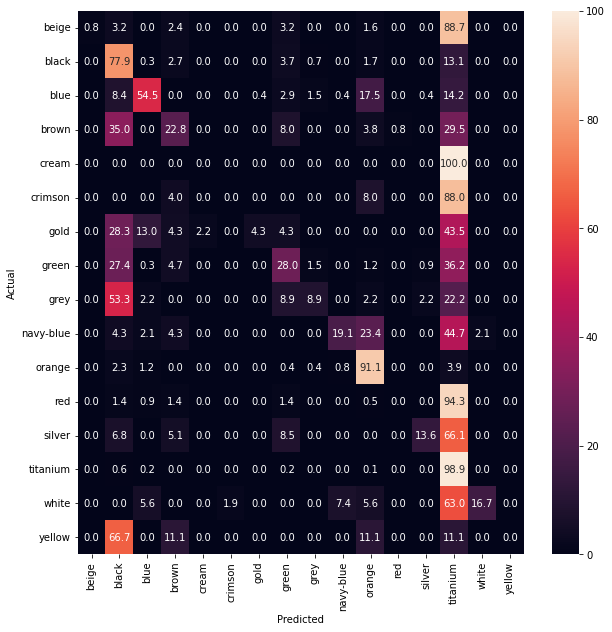

In [14]:
analyzer.plot_confusion_mat()

In [ ]:
analyzer.evaluate_model()

In [ ]:
history = hsv_model.fit(train_ds,
                          callbacks=callbacks,
                          epochs=25,
                          class_weight=class_weight,
                          initial_epoch=15)

Epoch 16/25
519/519 [==============================] - 145s 277ms/step - loss: 30.4018 - auc: 0.7560 - accuracy: 0.7598
Epoch 17/25
519/519 [==============================] - 145s 277ms/step - loss: 26.4296 - auc: 0.7715 - accuracy: 0.7674
Epoch 18/25
519/519 [==============================] - 145s 277ms/step - loss: 22.2064 - auc: 0.7939 - accuracy: 0.7750
Epoch 19/25
519/519 [==============================] - 145s 277ms/step - loss: 19.0210 - auc: 0.8143 - accuracy: 0.7850
Epoch 20/25
519/519 [==============================] - 145s 277ms/step - loss: 17.3330 - auc: 0.8243 - accuracy: 0.7881
Epoch 21/25
519/519 [==============================] - 145s 277ms/step - loss: 15.0796 - auc: 0.8425 - accuracy: 0.7993
Epoch 22/25
519/519 [==============================] - 146s 280ms/step - loss: 13.7839 - auc: 0.8514 - accuracy: 0.8042
Epoch 23/25
519/519 [==============================] - 145s 277ms/step - loss: 13.3410 - auc: 0.8576 - accuracy: 0.8063
Epoch 24/25
519/519 [===================

In [ ]:
hsv_model.save_weights('drive/MyDrive/checkpoints/hsv-weights-25.h5')

Making confusion matrix:


  0%|          | 0/55 [00:00<?, ?it/s]

Saving confusion matrix


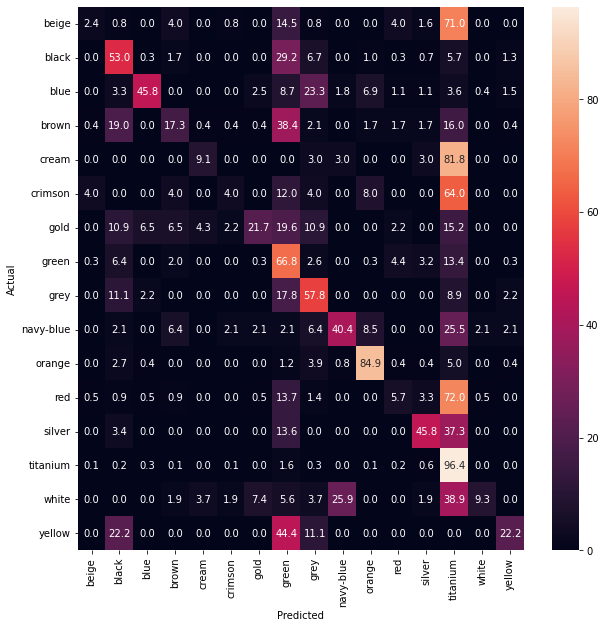

Calculating error types...
Writing in log file...
 All done. Check log file => HSV-model-2.csv


In [ ]:
analyzer = ErrorAnalyzer(model=hsv_model,
                         ds=val_ds,
                         classes=classes,
                         model_name='HSV-model-2')

analyzer.plot_confusion_mat()
analyzer.evaluate_model()

In [ ]:
history = hsv_model.fit(train_ds,
                          callbacks=callbacks,
                          epochs=35,
                          class_weight=class_weight,
                          initial_epoch=25)

Epoch 26/35
519/519 [==============================] - 145s 276ms/step - loss: 11.0629 - auc: 0.8781 - accuracy: 0.8214
Epoch 27/35
519/519 [==============================] - 145s 277ms/step - loss: 10.6729 - auc: 0.8829 - accuracy: 0.8261
Epoch 28/35
519/519 [==============================] - 144s 276ms/step - loss: 10.2715 - auc: 0.8852 - accuracy: 0.8276
Epoch 29/35
519/519 [==============================] - 144s 276ms/step - loss: 10.0874 - auc: 0.8880 - accuracy: 0.8261
Epoch 30/35
519/519 [==============================] - 145s 276ms/step - loss: 9.7326 - auc: 0.8930 - accuracy: 0.8288
Epoch 31/35
519/519 [==============================] - 145s 277ms/step - loss: 9.8528 - auc: 0.8908 - accuracy: 0.8304
Epoch 32/35
519/519 [==============================] - 145s 276ms/step - loss: 9.5334 - auc: 0.8951 - accuracy: 0.8347
Epoch 33/35
519/519 [==============================] - 145s 277ms/step - loss: 9.2548 - auc: 0.8978 - accuracy: 0.8369
Epoch 34/35
519/519 [=======================

In [ ]:
hsv_model.save_weights('drive/MyDrive/checkpoints/hsv-weights-35.h5')

Making confusion matrix:


  0%|          | 0/55 [00:00<?, ?it/s]

Saving confusion matrix


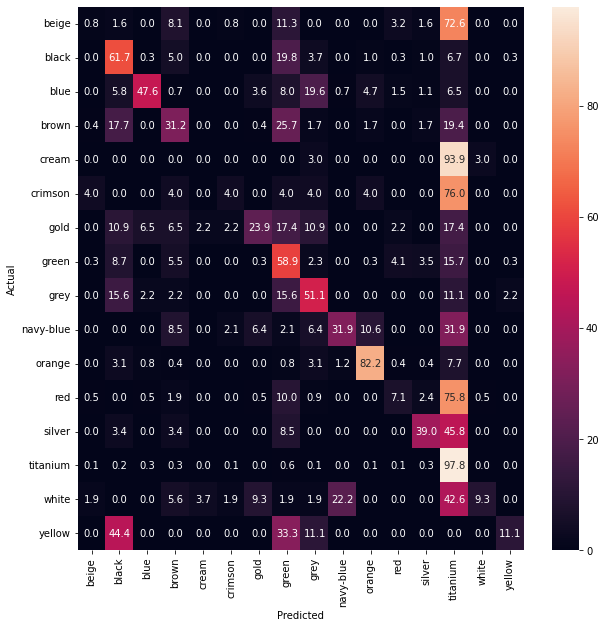

Calculating error types...
Writing in log file...
 All done. Check log file => HSV-model-3.csv


In [ ]:
analyzer = ErrorAnalyzer(model=hsv_model,
                         ds=val_ds,
                         classes=classes,
                         model_name='HSV-model-3')

analyzer.plot_confusion_mat()
analyzer.evaluate_model()